| **Feature**           | **Seasonal Pattern** | **Cyclical Pattern**       |
|-----------------------|----------------------|----------------------------|
| Repeat?               | No                   | Yes                        |
| Time Interval?        | No                   | Yes, Variable              |
| Driven by?            | Calendar             | Economic / Social Factors  |
| Predictable?          | Yes                  | No                         |
| Examples              | Holidays, Weather    | Stock Market, Sales        |


*Observed* - actrual data points over time <br>
*Residual* is the **observed** - the **predicted small residual** = good model fit


**Time series Forcasting techneuqes**:<br>
#### ***ARIMA***:<br>
ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting technique used to predict future points by understanding patterns in past data.<br>
ARIMA models are a combination of three components: AR (AutoRegressive), I (Integrated),MA (Moving Average).<br>(for ciclical )

#### ***Prophet***:<br>
Prophet is a time series forecasting tool developed by Facebook that automatically models trends, seasonality, and holidays, making it ideal for business data with recurring patterns and irregularities.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = 'Airpassangers.csv'

df = pd.read_csv(data)
df

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


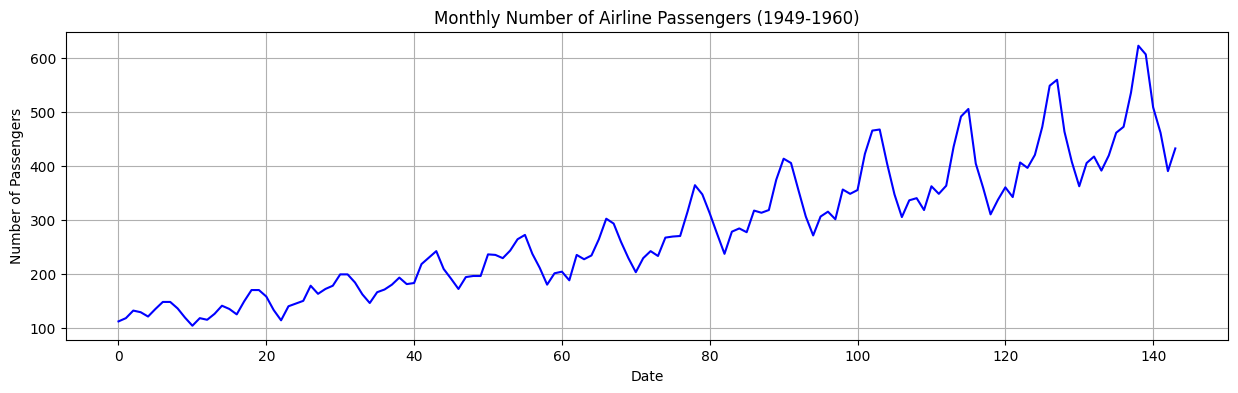

In [10]:

# Plotting the time series
plt.figure(figsize=(15,4))
plt.plot(df.index, df['Passengers'], label='Monthly Passengers', color='b')
plt.title('Monthly Number of Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)

plt.show()

In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi = 100): 
        plt.figure(figsize=(15,4), dpi = dpi)
        plt.plot(x, y)
        plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
        plt.show()

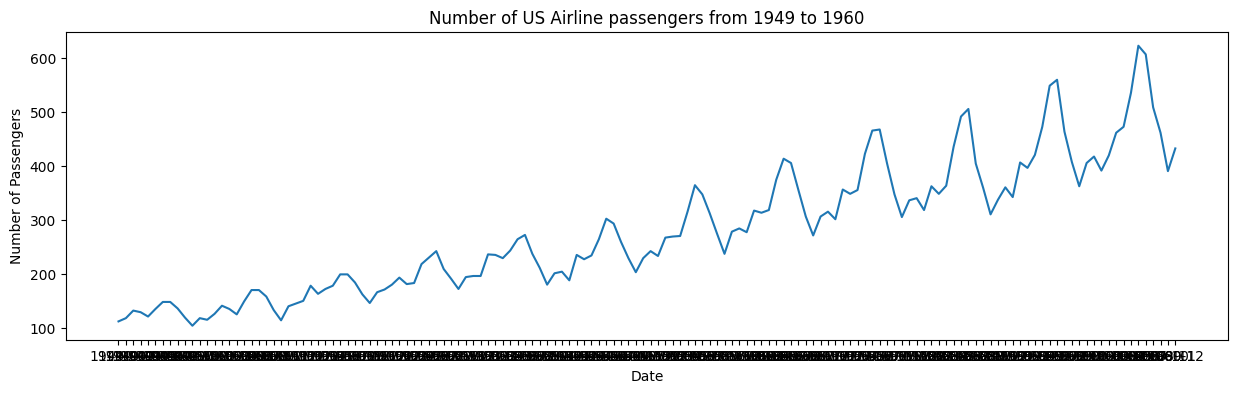

In [12]:
plot_df(df, x=df['Date'], y=df['Passengers'], title='Number of US Airline passengers from 1949 to 1960')

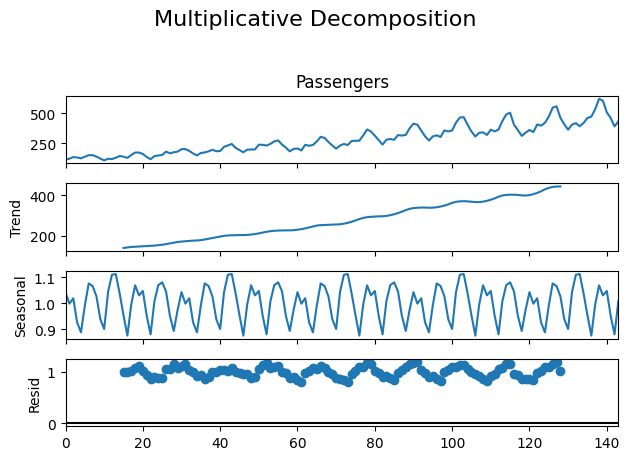

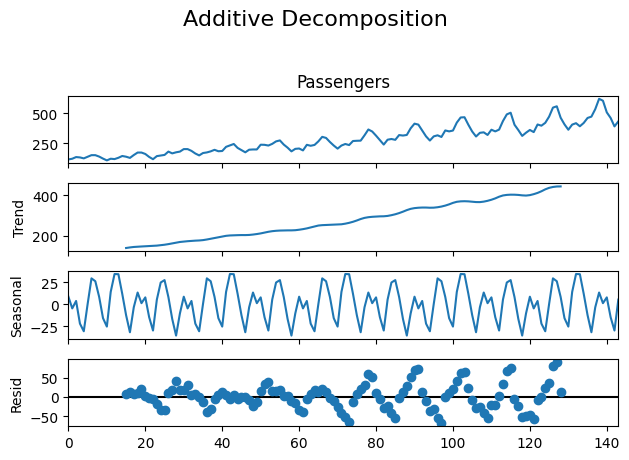

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose 
from dateutil.parser import parse   # Multiplicative Decomposition  
multiplicative_decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)  # Additive Decomposition 
additive_decomposition = seasonal_decompose(df['Passengers'], model='additive', period=30)  # Plot 
#plt.rcParams.update({'figure.figsize': (16,12)}) 
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")



In [15]:
result = adfuller(df['Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


In [16]:
print('if p-value > 0.05 -> Not stationary, differencing needed')

if p-value > 0.05 -> Not stationary, differencing needed


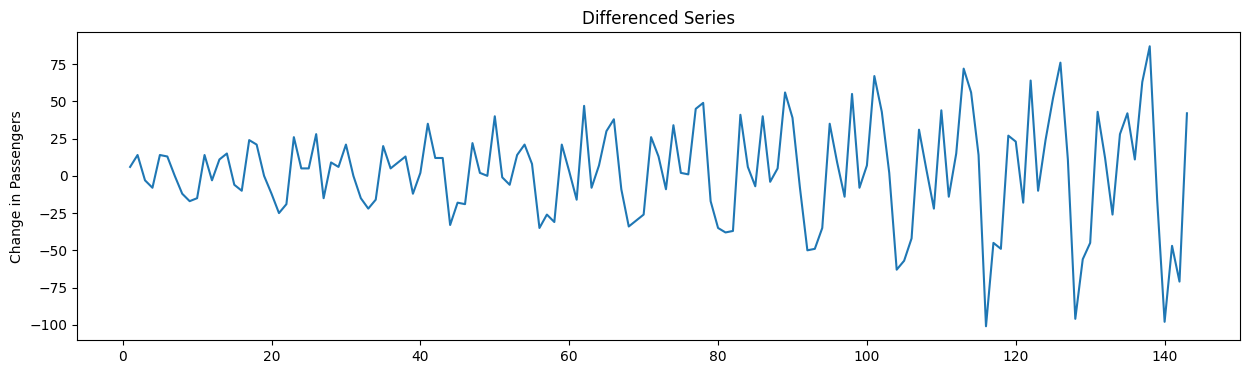

ADF Statistic (after differencing): -2.8292668241699994
p-value: 0.0542132902838255


In [17]:
df_diff = df['Passengers'].diff().dropna() # Plot the differenced series 
df_diff.plot(figsize=(15,4), title='Differenced Series') 
plt.ylabel('Change in Passengers') 
plt.show()  # Re-check stationarity 
result_diff = adfuller(df_diff) 
print(f'ADF Statistic (after differencing): {result_diff[0]}') 
print(f'p-value: {result_diff[1]}')

In [18]:
# (p, d, q) values can be tuned; here we use (1,1,1) as a start 
model = ARIMA(df['Passengers'], order=(1, 1, 1)) 
model_fit = model.fit() 
# Print summary 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 25 Apr 2025   AIC                           1394.683
Time:                        01:46:51   BIC                           1403.571
Sample:                             0   HQIC                          1398.294
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

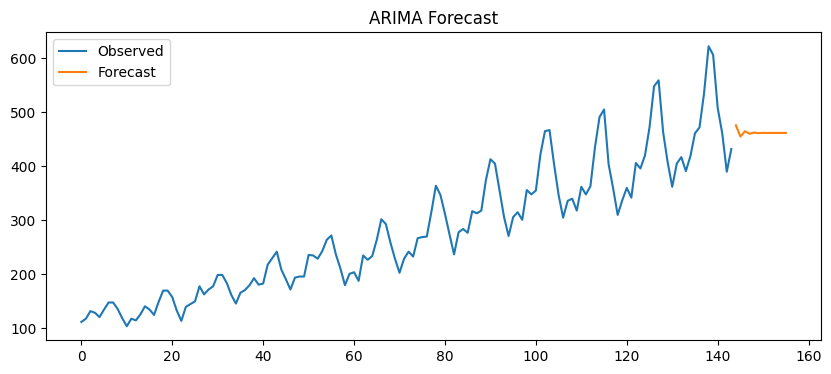

In [21]:
# Forecast next 12 months 
forecast = model_fit.forecast(steps=12)  # Plot actual and forecasted values 
plt.figure(figsize=(10, 4)) 
plt.plot(df['Passengers'], label='Observed') 
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast') 
plt.legend() 
plt.show()